In [111]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [112]:
def f(x):
  return  x**2 + 6 * np.exp(0.15 * x)

def f_det(x):
  return 2*x + 6 * 0.15 * np.exp(0.15 * x)

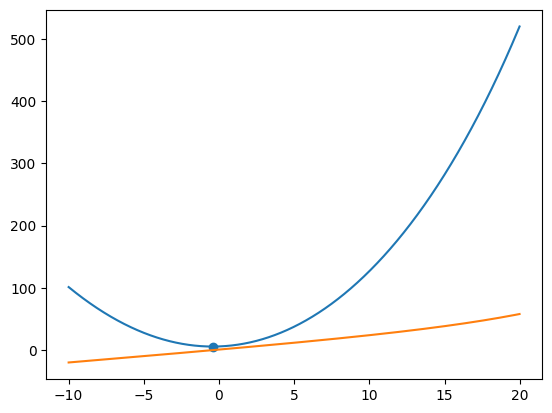

In [113]:

x = np.arange(-10, 20, 0.01)

y = f(x)
y_det = f_det(x)

plt.plot(x,y)
plt.plot(x, y_det)
plt.scatter([-0.42237717999739743], [f(-0.42237717999739743)])


In [114]:
def Dichotomy(a, b, eps, function):
  x = 0
  beta = eps / 10
  while(b - a > eps):
    x = (a+b)/2
    if function(x - beta) <  function(x + beta):
      b = x
    else:
      a = x
  return x

In [115]:
def BlockSearch(a, b, eps, n, function):
  t = 0
  while(b - a > 2 * eps):
    xk = (a+b)/2
    yk = function(xk)
    y = []
    x = []
    for i in range(n):
        newX = a + i * ((b-a)/(n-1))
        x.append(newX)
        y.append(function(newX))
    min_y_val_index = np.argmin(y)

    a = x[min_y_val_index-1]
    b = x[min_y_val_index+1]
    xk = x[min_y_val_index]
    yk = y[min_y_val_index]
    t+=1
  return xk

In [116]:
def DevisionByHalf(a, b, eps, function):
    return BlockSearch(a, b, eps, 4, function)

In [117]:
def GoldenRatio(a, b, eps, function):
  lam  = 1.61803398874989

  x1 = b - (b-a)/lam
  x2 = a + (b-a)/lam
  y1 = function(x1)
  y2 = function(x2)
  while(b - a > eps):
    if y1 <  y2:
      b = x2
      x2 = x1
      y2 = y1
      x1 = a + b - x2
      y1 = function(x1)
    else:
      a = x1
      x1 = x2
      y1 = y2
      x2 = a + b - x1
      y2 = function(x2)
  
  x = 0
  if y1 < y2:
    x = x1
  else:
    x = x2
  return x

In [118]:
#Функция получения значения параметра z
def get_z_value(a, b):
  return f_det(a) + f_det(b) + 3 * ((f(a) - f(b)) / (b - a))

#Функция получения значения параметра w
def get_w_value(z, a, b):
  return math.sqrt((z ** 2 - f_det(a) * f_det(b)))

#Функция получения значения параметра y
def get_y_value(z, w, a, b):
  return (z + w - f_det(a)) / (f_det(b) - f_det(a) + 2 * w)

#Функция расчета значения x(шаг 1)
def get_x_value(a, b):
  z = get_z_value(a, b)
  w = get_w_value(z , a, b)
  y = get_y_value(z, w, a, b)
  if(y >= 0 and y <= 1):
    return a + y * (b - a)
  elif(y < 0):
    return a
  else:
    if(y > 1):
      return b

#Функция для расчета методом куб. интерполяции
def cubic_interpolation(a, b, eps):
  x_result = get_x_value(a, b)
  while(abs(f_det(x_result)) > eps and x_result != a and x_result != b):
    if(f_det(x_result) > 0):
      b = x_result
    else:
      if(f_det(x_result) < 0):
        a = x_result
    x_result = get_x_value(a, b)

  y_result = f(x_result)
  return x_result

In [119]:
g = Dichotomy(-10,20,0.0001, f)
print(g)

-0.4223823547363281


In [120]:
g = BlockSearch(-10,20,0.0001,1000, f)
print(g)

-0.42237432627823


In [121]:
g = DevisionByHalf(-10,20,0.0001, f)
print(g)

-0.42239586273152646


In [122]:
g = GoldenRatio(-10,20,0.0001, f)
print(g)

-0.42237717999739743


In [123]:
g = cubic_interpolation(-1,2,0.0001)
print(g)

-0.4223741330330725
